# Solutions to week 1 exercises in Introduction to Financial Engineering

This Jupyter Notebook shows one way on how to do the exercises for week 1 in Python.
We start by importing the needed libraries. 

Note that you probably don't have yfinance installed. If this is the case, you can install yfinance to your Anaconda environment by copy pasting the following line into Anaconda Prompt (Windows) or the terminal (MacOS): <br />
pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

And if you are not using an Anacodna environment, you can simply install the yfinance package by copy pasting the following line in Command Prompt (Windows) or Terminal (Mac): <br />
pip install yfinance

In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean

Before we fetch historical weekly prices of the XOM stock, we first have to create *datetime* objects with our start and end dates which are 20/2/1995 and 1/9/2021, respectively. <br /> 

We then use the yfinance method *download* with 'XOM', start date, end date, and the interval (weekly data) as our inputs, to collect data of the XOM stock. 

The yfinance.download method gives us 6 columns (Open, High, Low, Close, Adj Close, Volume). <br />

- Open:: The price of the stock at the very first trade of the week. <br />
- High:: The highest price of the stock that was reached in a trade during the week. <br />
- Low:: The lowest price of the stock that was reached in a trade during the week. <br />
- Close:: The price of the stock at the very last trade of the week. <br />
- Adj Close:: The adjusted price of the stock at the very last trade of the week. Read more about adjusted prices at https://www.investopedia.com/terms/a/adjusted_closing_price.asp <br />
- Volume:: The number of shares of the stock traded during the week. 



In [2]:
start = datetime.datetime(1995,2,20)
end = datetime.datetime(2021,9,1)

stock = yf.download('XOM', start=start, end=end, interval='1wk')
print('Columns in stock dataframe:: {}'.format(list(stock)))

[*********************100%***********************]  1 of 1 completed
Columns in stock dataframe:: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


**2.a: Plot the adjusted closing price and the closing price in the same graph**

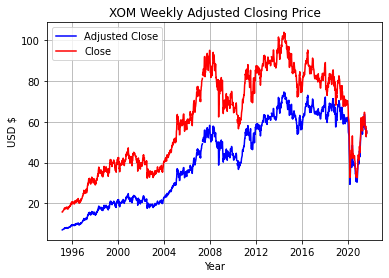

In [16]:
plt.plot(stock['Adj Close'], color='b', label='Adjusted Close')
plt.plot(stock['Close'], color='r', label='Close')
plt.title('XOM Weekly Adjusted Closing Price')
plt.xlabel('Year')
plt.ylabel('USD $')
plt.grid()
plt.legend()
plt.show()

**2.b: Calculate weekly returns (using adjusted prices)**

You can do this in two ways. Either, you can define your own function where you calculate the returns manually or using the inbuilt Pandas method *pct_change()* which does exactly the same. Note that the very first return (week 1 of the dataset is a NaN since the calculation of the return requires the stock price from the week prior). 

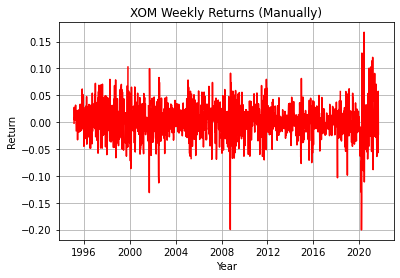

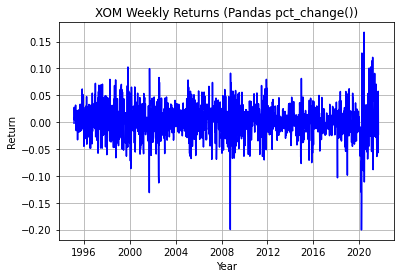

In [4]:
# Manually calculate the return
def calculate_returns(prices):
    return (prices / np.roll(prices, 1) - 1)[1:]

returns = calculate_returns(stock['Adj Close'].to_numpy())
plt.plot(stock.index[1:], returns, color='r')
plt.title('XOM Weekly Returns (Manually)')
plt.xlabel('Year')
plt.ylabel('Return')
plt.grid()
plt.show()

# Using the inbuilt Pandas method 'pct_change()'
stock['Returns'] = stock['Adj Close'].pct_change()
plt.plot(stock['Returns'][1:], color='b')
plt.title('XOM Weekly Returns (Pandas pct_change())')
plt.xlabel('Year')
plt.ylabel('Return')
plt.grid()
plt.show()

**2.c: Calculate the weekly average return (Note: Remember the difference between arithmetic and geometric averages!)**

Now, we will compute the average weekly return of the XOM stock. If $X_0$ is our investment in the XOM stock in week 0 and $R_i$ is the return in week $i$, then our investment in week $n$ is grown to: $X_n = X_0(1+R_1)(1+R_2)...(1+R_n)$. Since our investment grows to our original investment multiplied with the product of 1 + each weekly return for all weeks, it doesn't make sense to do the arithmetic average (summing all returns up and divide by number of weeks). Thus, we need to do the geometric average which is computed as $\bar{R} = \Big(\prod_{i=1}^{N} (1+R_i)\Big)^{\frac{1}{N}} - 1$. Since there may be numerically issues writing the geometric average as a function in Python, it is safer and easier to use a prewritten function for this. 
From the scipy library, there is a method called gmean which computes the geometric average. Likewise, the standard deviation can be computed using the *std* method from the numpy library. 

In [5]:
xom_geomean_weekly = gmean(1 + stock['Returns'].to_numpy()[1:]) - 1
xom_geomean_annually = (1+xom_geomean_weekly) ** 52 - 1

print('Weekly Geometric Mean of XOM Returns:: {}%'.format(np.round(xom_geomean_weekly*100, 4)))
print('Annually Geometric Mean of XOM Returns:: {}%'.format(np.round(xom_geomean_annually*100, 4)))

Weekly Geometric Mean of XOM Returns:: 0.1455%
Annually Geometric Mean of XOM Returns:: 7.8562%


**2.d: Calculate the standard deviation of returns**

From the numpy library, there exists a method called *std* that computes the standard deviation of an array. 

In [6]:
xom_sd_weekly = np.std(stock['Returns'].to_numpy()[1:])
xom_sd_annually = np.sqrt(52) * xom_sd_weekly
print('Weekly Standard Deviation of XOM Returns:: {}%'.format(np.round(xom_sd_weekly*100, 4)))
print('Annually Standard Deviation of XOM Returns:: {}%'.format(np.round(xom_sd_annually*100, 4)))

Weekly Standard Deviation of XOM Returns:: 3.1946%
Annually Standard Deviation of XOM Returns:: 23.0367%


**2.e: Calculate log returns and the weekly average log return and compare with the ”real”
weekly returns**

Log returns are calculated as log$\Big(\frac{P_t}{P_{t-1}}\Big)$ which is equivalent to log$(R_t + 1)$. After computing the log returns, we can compute the average weekly log return by computing the arthimetric average of the log returns. Why not the geometric average? Remember that the average return can be expressed as 

$$(1 + \bar{R})^N = (1+R_1)(1+R_2)...(1+R_3)$$ 

By taking the log on both sides and hereafter divide by $N$, we get: 

$$log(1+\bar{R}) = \frac{log(1+R_1) + log(1+R_2) + ... + log(1+R_N)}{N}$$

which is the arthimetric average of the log returns which also is a good approximation for the true value of $\bar{R}$ which we can call $\hat{R}$ s.t. 

$$\hat{R} = log(1+\bar{R}) = \frac{log(1+R_1) + log(1+R_2) + ... + log(1+R_N)}{N}$$ 

We can also choose to get the exact value by computing $\bar{R} = e^{\hat{R}} - 1$


**Why would anyone work with the log returns instead of the real returns then?** First of all, it is computationally easier (more stable) and faster to work with log returns. Moreover, and you'll learn this later, the log returns tends to have a nicer distribution than the actual returns and thus more suitable for statistical models and future predictions. 

Weekly Mean of Log 1 + R^XOM:: 0.1454%
Weekly Standard Deviation of Log 1 + R^XOM:: 3.2149%
Weekly Geometric Mean of XOM Returns:: 0.1455%
Weekly Standard Deviation of XOM Returns:: 3.1946%


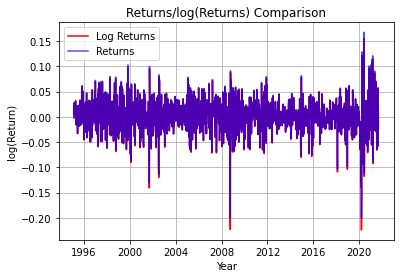

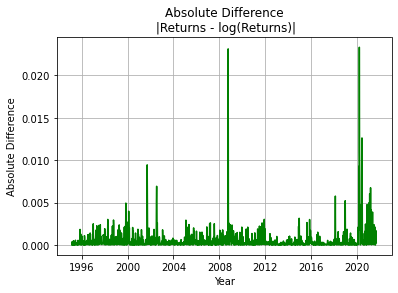

In [7]:
stock['Log Returns'] = np.log(1 + stock['Returns'])
xom_logreturn_mean = np.mean(stock['Log Returns'].to_numpy()[1:])
xom_logreturn_sd = np.std(stock['Log Returns'].to_numpy()[1:])

print('Weekly Mean of Log 1 + R^XOM:: {}%'.format(np.round(xom_logreturn_mean*100, 4)))
print('Weekly Standard Deviation of Log 1 + R^XOM:: {}%'.format(np.round(xom_logreturn_sd*100, 4)))

print('Weekly Geometric Mean of XOM Returns:: {}%'.format(np.round(xom_geomean_weekly*100, 4)))
print('Weekly Standard Deviation of XOM Returns:: {}%'.format(np.round(xom_sd_weekly*100, 4)))

plt.plot(stock['Log Returns'], color='r', label='Log Returns')
plt.plot(stock['Returns'], color='b', alpha=0.7, label='Returns')
plt.title('Returns/log(Returns) Comparison')
plt.xlabel('Year')
plt.ylabel('log(Return)')
plt.grid()
plt.legend()
plt.show()

diff = np.abs(stock['Returns'] - stock['Log Returns'])
plt.plot(diff, color='g')
plt.title('Absolute Difference\n |Returns - log(Returns)|')
plt.xlabel('Year')
plt.ylabel('Absolute Difference')
plt.grid()
plt.show()

**On to part 3 of the exercises. Here, we have to download daily data of three different ETFs. We can do it in the same way as before, but where we put a list of tickers in the yfinance.download method. We then get a dataframe which has columns in columns (nested columns). The way to access a specific column is shown beneath.**

In [17]:
start = datetime.datetime(2005,1,2)
end = datetime.datetime(2021,9,1)

ticks = ['SPY', 'XLF', 'EEM']
stocks = yf.download(ticks, start=start, end=end, interval='1d')
print('Columns in stock dataframe:: {}'.format(list(stocks)))

print(stocks.head())

# if you e.g. want to access the Close prices of SPY, you can do the following:
SPY_close_prices = stocks['Close']['SPY']

[*********************100%***********************]  3 of 3 completed
Columns in stock dataframe:: [('Adj Close', 'EEM'), ('Adj Close', 'SPY'), ('Adj Close', 'XLF'), ('Close', 'EEM'), ('Close', 'SPY'), ('Close', 'XLF'), ('High', 'EEM'), ('High', 'SPY'), ('High', 'XLF'), ('Low', 'EEM'), ('Low', 'SPY'), ('Low', 'XLF'), ('Open', 'EEM'), ('Open', 'SPY'), ('Open', 'XLF'), ('Volume', 'EEM'), ('Volume', 'SPY'), ('Volume', 'XLF')]
            Adj Close                            Close                         \
                  EEM        SPY        XLF        EEM         SPY        XLF   
Date                                                                            
2005-01-03  16.294292  86.852043  17.542488  22.194445  120.300003  24.711617   
2005-01-04  15.792627  85.790764  17.375257  21.511110  118.830002  24.476036   
2005-01-05  15.599294  85.198761  17.346418  21.247778  118.010002  24.435417   
2005-01-06  15.588691  85.631920  17.432920  21.233334  118.610001  24.557270   
2005-01

**3.a: Plot the adjusted closing prices in the same graph. Does it make sense to plot them in the same graph or should any adjustment be made?**

As you can see in the first plot, it is hard to compare the closing prices from the three ETFs since they are on different scales (SPY has a much higher price than EEM and XLF). Likewise, they are hard to compare when they are in 3 distinct plots. Thus, one way to compare them is to normalize the closing prices with respect to each column/ETF to be between 0 and 1. This is done by substracting the min value and dividing with the difference between the max and min value for each column. 

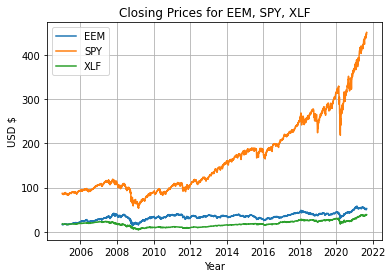

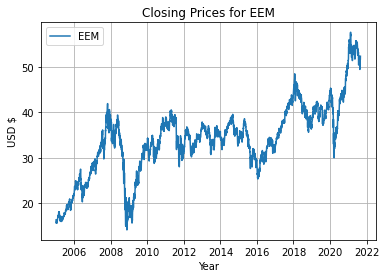

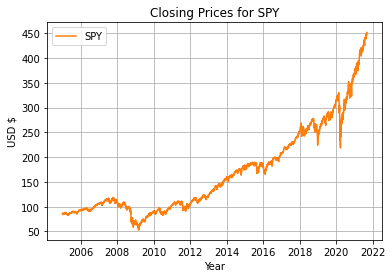

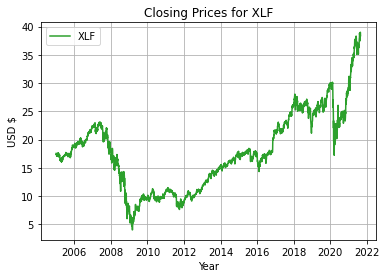

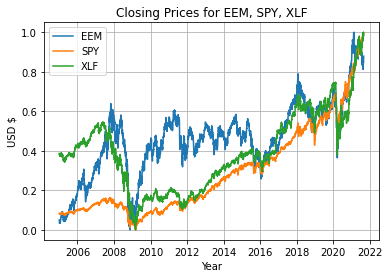

In [18]:
colors = ['C0', 'C1', 'C2']

plt.plot(stocks['Adj Close'], label=list(stocks['Adj Close']))
plt.title('Closing Prices for EEM, SPY, XLF')
plt.xlabel('Year')
plt.ylabel('USD $')
plt.legend()
plt.grid()
plt.show()

for i,etf in enumerate(list(stocks['Adj Close'])):
    plt.plot(stocks['Adj Close'][etf], label=etf, color=colors[i])
    plt.title('Closing Prices for {}'.format(etf))
    plt.xlabel('Year')
    plt.ylabel('USD $')
    plt.legend()
    plt.grid()
    plt.show()

normalized_adjusted_closing_prices = (stocks['Adj Close']-stocks['Adj Close'].min(0))/(stocks['Adj Close'].max(0) - stocks['Adj Close'].min(0)) 
plt.plot(normalized_adjusted_closing_prices, label=list(stocks['Adj Close']))
plt.title('Closing Prices for EEM, SPY, XLF')
plt.xlabel('Year')
plt.ylabel('USD $')
plt.legend()
plt.grid()
plt.show()

**3.b: Calculate the daily returns, average daily returns, and standard deviation for each of the three securities**

In this solution, the Pandas *pct_change()* is used to compute the returns for each ETF. Hereafter, we are using the *gmean* from the Scipy library to compute the (daily) geometric mean of the returns and the (daily) standard deviation using the *std* function from the Numpy library. We can choose to annualize the average returns by $(1+\bar{R}^D)^252 - 1. And to annualize the standard deviation of the daily returns, we multiply with the square root of 252. 

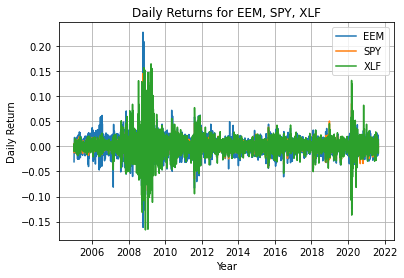

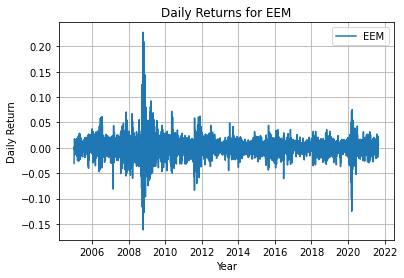

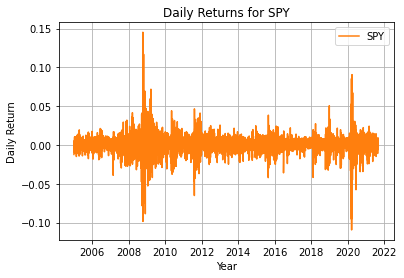

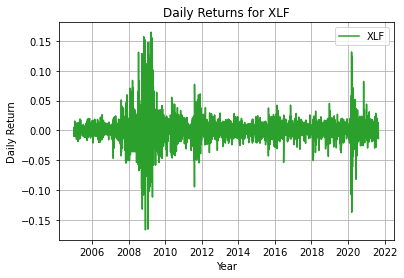

Geometric Average of Daily Returns for EEM:: 0.0279%
Geometric Average of Annual Returns for EEM:: 7.272%
Standard Deviation of Daily Returns for EEM:: 1.863%
Standard Deviation of Annual Returns for EEM:: 29.5743%

Geometric Average of Daily Returns for SPY:: 0.0393%
Geometric Average of Annual Returns for SPY:: 10.4123%
Standard Deviation of Daily Returns for SPY:: 1.2214%
Standard Deviation of Annual Returns for SPY:: 19.389%

Geometric Average of Daily Returns for XLF:: 0.0187%
Geometric Average of Annual Returns for XLF:: 4.8199%
Standard Deviation of Daily Returns for XLF:: 1.973%
Standard Deviation of Annual Returns for XLF:: 31.3197%



In [19]:
returns = stocks['Adj Close'].pct_change()

plt.plot(returns, label=list(stocks['Adj Close']))
plt.title('Daily Returns for EEM, SPY, XLF')
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.legend()
plt.grid()
plt.show()

for i, etf in enumerate(list(returns)):
    plt.plot(returns[etf], label=etf, color=colors[i])
    plt.title('Daily Returns for {}'.format(etf))
    plt.xlabel('Year')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid()
    plt.show()
    
geomean_returns_daily = np.zeros(len(ticks))
geomean_returns_annually = np.zeros(len(ticks))
sd_returns_daily = np.zeros(len(ticks))

for i, etf in enumerate(list(returns)):
    geomean_returns_daily[i] = gmean(1 + returns[etf].to_numpy()[1:]) - 1
    sd_returns_daily[i] = np.std(returns[etf].to_numpy()[1:])

    print('Geometric Average of Daily Returns for {}:: {}%'.format(etf, np.round(geomean_returns_daily[i]*100, 4)))
    print('Standard Deviation of Daily Returns for {}:: {}%'.format(etf, np.round(sd_returns_daily[i]*100, 4)))


**3.c: Calculate the variance-covariance matrix of the securities’ daily returns**

Here we are using the Pandas inbuilt *cov* function which computes the variance/covariance matrix by giving the function the daily returns matrix as input.

In [20]:
covmat = returns.cov()

print('Covariance matrix of daily returns')
print(covmat)

Covariance matrix of daily returns
          EEM       SPY       XLF
EEM  0.000347  0.000193  0.000264
SPY  0.000193  0.000149  0.000205
XLF  0.000264  0.000205  0.000389

Annualized covariance matrix
          EEM       SPY       XLF
EEM  0.087485  0.048579  0.066429
SPY  0.048579  0.037602  0.051715
XLF  0.066429  0.051715  0.098116


**3.d: Calculate the correlation of the securities’ daily returns**

We compute the correlation matrix by using the Pandas *corr()* function. I want you to think whether it is needed to annualize the correlation matrix! 

In [21]:
corrmat = returns.corr()

print('Correlation matrix of daily returns')
print(corrmat)

Correlation matrix of daily returns
          EEM       SPY       XLF
EEM  1.000000  0.846977  0.717000
SPY  0.846977  1.000000  0.851412
XLF  0.717000  0.851412  1.000000
